In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st


from IPython.core.display import HTML

css = open('/home/mahi/MEGA/Programming/style-table.css').read() 
# + open('/home/mahi/MEGA/Programming/custom.css').read()
HTML('<style>{}</style>'.format(css))


# Machine Learning

<a href="http://projecteuclid.org/download/pdf_1/euclid.ss/1009213726">
### Statistics vs Machine Learning
</a>

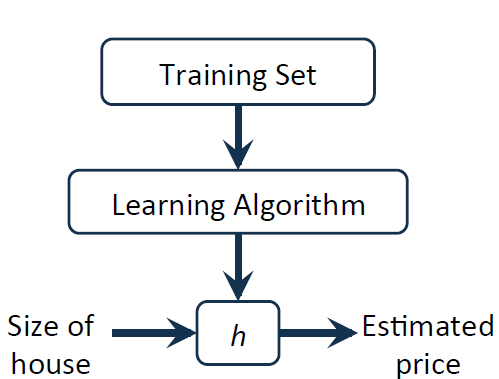

In [2]:
import IPython

IPython.display.Image("src/ML_Outline.png",retina=True)

In [2]:
pd.read_csv('./houseprice.csv')

,x0,Size(feet2) x1,Bedrooms x2,Floors x3,Age(years) x4,Price($1000) y
0,1,2140,5,1,45,460
1,1,1416,3,2,40,232
2,1,1534,3,2,30,315
3,1,852,2,1,36,178


#### Terminilogy:
$\hspace{3em} m$ = number of samples i.e. len(training examples)

$\hspace{3em} n$ = number of features

$\hspace{3em} x^{(i)}$ = input variable (features) of the $i^{th}$ training example.

$\hspace{3em} x_j^{(i)}$ = value of variable (features) $j$ in the $i^{th}$ training example.

$\hspace{3em} y^{(i)}$ = output variables (training OR target) of the $i^{th}$ training example

$\hspace{3em} \theta$ = parameters/ weights

$\hspace{3em} \theta_j$ = parameter/ weight of $j$

(Refer video 4-1)

# We train the data to find the "HYPOTHESIS" (equation)


[Hypothesis](## Linear representation of Hypothesis)

### Basic Algebra

$$ y = mx + c $$

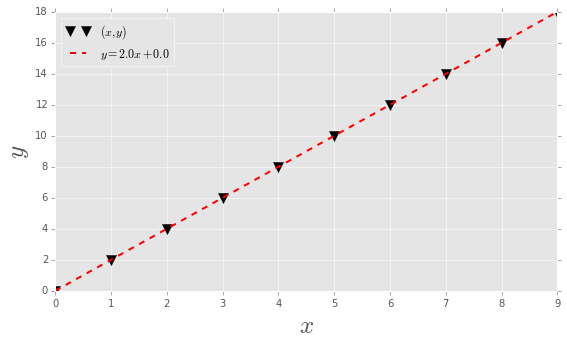

In [37]:
x = np.arange(0, 10)
y = x*2


def linefit(x, y):
    slope = st.linregress(x,y)[0]
    intercept = st.linregress(x,y)[1]
    return slope, intercept

slope, intercept = linefit(x,y)

fit_y = x*slope+intercept


fig, (lin_regression) = plt.subplots(1,1,figsize = (9,5))

lin_regression.plot(x,y, 'kv', markersize=10, label=r"$(x,y)$")
lin_regression.plot(x,fit_y, 'r--', linewidth=2, 
                    label=r"$y={0}x+{1}$".format(slope,intercept))


lin_regression.set_xlabel(r"$x$", fontsize = 25)
lin_regression.set_ylabel(r'$ y$',fontsize = 25)
lin_regression.figure.set_dpi(360)
lin_regression.legend(loc = 'best')

$$ Y = C + m X \pm error $$
    
    Assume every data point(y) can be represented as mx+C.
$$ Y_1 = \beta_0 + \beta_1 X_1 \pm error $$
$$ Y_2 = \beta_0 + \beta_1 X_2 \pm error $$
$$ Y_3 = \beta_0 + \beta_1 X_3 \pm error $$
$$~~~.~~~~~.~~~~~~~~~.~~~~~~~~~~~~~~~.~~~$$
$$~~~.~~~~~.~~~~~~~~~.~~~~~~~~~~~~~~~.~~~$$
$$~~~.~~~~~.~~~~~~~~~.~~~~~~~~~~~~~~~.~~~$$

$$ Y_n = \beta_0 + \beta_1 X_n \pm error $$

#### Matrix Form

$$
    \begin{bmatrix}
      Y_1  \\
      Y_2  \\
      Y_3  \\
      ~.~\\
      ~.~\\
      Y_n  \\
     \end{bmatrix}
    =
    \begin{bmatrix}
      \beta_0 + \beta_1 X_1 \\
      \beta_0 + \beta_1 X_2 \\
      \beta_0 + \beta_1 X_3 \\
        ~~~.~~~~~.~~~~~~~~~.~\\
        ~~~.~~~~~.~~~~~~~~~.~\\
       \beta_n + \beta_1 X_n \\
     \end{bmatrix}
    \pm
    \begin{bmatrix}
      \epsilon_1 \\
      \epsilon_2 \\
      \epsilon_3 \\
        ~.~\\
        ~.~\\
       \epsilon_n \\
     \end{bmatrix}
$$

$$   \begin{bmatrix}
      Y_1  \\
      Y_2  \\
      Y_3  \\
      ~.~\\
      ~.~\\
      Y_n  \\
     \end{bmatrix}
    =
    \begin{bmatrix}
      1~~ X_1 \\
      1~~ X_2 \\
      1~~ X_3 \\
        ~~~.~~~.~~\\
        ~~~.~~~.~~\\
       1~~ X_n \\
     \end{bmatrix}
    \begin{bmatrix}
      \beta_0 \\
      \beta_1 \\
     \end{bmatrix} 
    \pm
    \begin{bmatrix}
      \epsilon_1 \\
      \epsilon_2 \\
      \epsilon_3 \\
        ~.~\\
        ~.~\\
       \epsilon_n \\
     \end{bmatrix}
$$ 

$\beta_{2x1}$ is the **Vector of parameters**

$X_{nx2}$ is **The design matrix**

$\epsilon_{nx1}$ is the **Vector of error terms**

$Y_{nx1}$ is the **Vector of Response**

$$ Y_{nx1} = \beta_{2x1} X_{nx2} \pm \epsilon_{nx1}$$

Note:

Don't be confused by the variables $x~and~X$, ($x1 \ne X1$).

Above $X1, X2, X3$ are parameters (slopes for each data points).

Below $x1, x2, x3$ are features.

## Linear representation of Hypothesis

#### Hypothesis:

$$ h_\theta =  \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3+ .... + \theta_n x_n =\sum_{x=0}^n \theta_n x_n  = \theta^T . x \pm error$$


#### Parameters (weights):
$$ \theta_0 , \theta_1, \theta_2, .... \theta_n \hspace{2em}$$


This basically a multi dimensions $ y = m_1x_1 + m_2x_2 + ..  + c $

In [12]:
def hypothesis(features, weights):
    h_x = np.dot(features, weights)
    return h_x

$$ h_\theta =  \theta^T . x \pm error $$

$$ error (\epsilon)= h_\theta -  \theta^T . x $$

choose $ \theta $ such that $ h_\theta(x_i)\approx y_i $ by reducing $ error (\epsilon) \to 0 $ 

[ $h_\theta$ of $x_i$ ]

#### Cost / Error Function:
$$J(\theta_0,..\theta_m)= \frac{1}{2m} \sum_{x=1}^m [h_\theta(x^i)-y^i)]^2 $$

$$h_\theta(x^i) = \sum_{j=0}^N \theta_j x_j^i = \theta_0 x_0^i+\theta_1 x_1^i + ... + \theta_n x_n^i = y_{predicted}^i$$


Footnote:

$J(\theta_0,..\theta_m) \equiv ( \epsilon_1, \epsilon_2, \epsilon_3)$

In [13]:
def cost_function(features, target, weights):
    m = len(target)
    sum_of_square_errors = numpy.square(hypothesis(features, weights) - target).sum()
    cost = sum_of_square_errors / (2*m)
    return cost

### Goal:   Minimize the cost function / error

$$\hspace{2em} minimize ~ J(\theta_0,\theta_1, .... \theta_n)$$

## Method 1: Linear regression with "Gradient descent" (Numerical method)


$$\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

After substituting $J_{\theta}$ and similifying

$$ \theta_j := \theta_j + \frac{\alpha}{m} \sum^m_{i=1} \Big( y^i - h_\theta(x^i)\Big)x_j^i
$$

$\hspace{10em}(simulatenously~update~\theta_j ~for~all~j)$

STEPS:
    
   * Calculate the hypothesis $ h = X^T  \theta $ 
   * Calculate the loss $ J_{\theta} = y - h$ (Maybe cost squared $\frac{loss^2}{2m}$ !!)
   * Calculate the gradient = $X' * loss$
   * Update the parameters $\theta = \theta + \frac{\alpha}{m} * gradient$

Gradient Descent notes taken from <a href="https://class.coursera.org/ml-003/lecture"> coursera.com </a>



In [44]:
#Find the cost function/hypothesis by iterating 'num_iterations' times on the training data

def gradient_descent(features, target, weights, alpha, num_iterations):
    import pandas as pd
    import numpy
    m = len(target)
    cost_history = []
    
    for i in range(num_iterations):
        h_x = hypothesis(features, weights)
        loss = numpy.dot((h_xi - values), features)
        theta = theta - alpha*loss/m
        cost = compute_cost(features,values,theta)        
        cost_history.append(cost)
        

    return theta, pandas.Series(cost_history) # leave this line for the grader


## Method 2: Linear regression with "Normal equation" (Analytical method)

Refer 4-6


Minimize Cost function $(J_\theta)$ explicity by taking its derivatives wrt to $\theta_j$

$$\frac{\partial}{\partial \theta_j}(J_\theta) = 0$$

Normal equations

$$ X^TX\theta = X^T \vec{y}$$

The value of $\theta$ that minimizes $J(\theta)$ in <u>closed form</u> (antonym: iterative)

$$\theta = (X^TX)^{-1}X^T\vec{y} $$

**Note:**

Some matrices are non-inveertable (singular/degenerate) in rare scenarios where,
1. The feature matrix $X$ has redundent features such as hoise price in feet$^2$ and m$^2$.
2. Too many feature (e.g. $m \le n $). 

**Solution:**

Delete some features or use regularization.

Use `pinv` (pseudo-inverse) instead of `inv` (inverse)

In [23]:
def cost_func_normal(x_matrix,y_vector):
    from numpy.linalg import inv,pinv
    if len(y_vector) > len(x_matrix[0]):
        #normal inverse
        z = inv(dot(np.transpose(x_matrix),x_matrix))
        theta = dot(dot(z,np.transpose(x_matrix)),y_vector)
        return theta
    else:
        #psudo inverse
        z = pinv(dot(np.transpose(x_matrix), x_matrix))
        theta = dot(dot(z,np.transpose(x_matrix)), y_vector)
        return theta
    
    #Need to verfiy the code.

## Method 3: Linear regression with "Probabilistic interpretation"


Give a set of probabilistic assumption, under which least-square is derives as a very natural algorithm.

#### Assume that the target varbiables and the inmput are related by 
$$y^{(i)}=\theta^Tx^{(i)} + \epsilon^{(i)}$$


$\epsilon^{(i)}$ is the unmodeled effects or random noise, distributed IID (independently and identically distributed) according to Gaussian distribution. The 'mean' and 'variance' of $\epsilon^{(i)}$ are $0$ and  $\sigma^2$.


$$ p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi\sigma}exp\Big( - \frac{(y^{(i)}) - \theta^T x^{(i)})^2}{2\sigma^2} \Big)}$$

## Method 4: "Locally weighted" Linear regression


# Multiple variables

## Hypothesis reprsentation (Polynomial)

#### Hypothesis

$$ h_\theta(x) =  \theta_0 x^0 + \theta_1 x_1^1+ \theta_2 x_2^2 + \theta_3 x_3^3+ .... + \theta_n x_n^n$$
$$ h_\theta(x) =  \theta_0 x^0 + \theta_1 x_1^1+ \theta_2 \sqrt{x_2} +  .... \theta f(x_n)$$

Many possible ways to represent $h_\theta(x)$ similar to a polynomial equation

Given data **x**, a column vector, and **y**, the target vector, the data matrix for a polynomial regression can be created by appending polynomials of **x**. For example, consider if

$$ \mathbf{x} = \begin{bmatrix}
       2    \\[0.3em]
       -1 \\[0.3em]
       \frac{1}{3}         
     \end{bmatrix}
$$

Using just this vector in linear regression implies the model:

$$y=\alpha_1x$$

We can add columns that are powers of the vector above, which represent adding polynomials to the regression. Below we show this for polynomials up to power 3:

$$
X = \begin{bmatrix}
       2 & 4 & 8 \\[0.3em]
       -1 & 1 & -1 \\[0.3em]
       \frac{1}{3} & \frac{1}{3^2} & \frac{1}{3^3}
     \end{bmatrix}
$$

This is our new data matrix that we use in sklearn's linear regression, and it represents the model:

$$y = \alpha_1 x + \alpha_2x^2 + \alpha_3x^3$$

Note that I did not add a constant vector of 1's, as sklearn will automatically include this.

# Classification Problems

#### Binary classification problem

$$ y \in \{ 0,1 \} $$


In case of a **Linear classifier**: $ \big( h_\theta (x) = \theta^T x \big)$

$$~           /
1|      x x x 
  |       / 
  |      / 
  |     /
0|_x_x_x_______
     /
$$

We can threshold the classifier output $h_\theta (x)$ at 0.5.

* if $h_\theta \ge 0.5 ; ~predict~ y=1$

* if $h_\theta \le 0.5 ; ~predict~ y=0$

Drawbacks:
   
   1. Linear classifier is highly influenced by outiers, since the *mean* changes drastically.
   
   2. Although $0 \le y \le 1$, linear regression may yeild $ 0 > h_\theta (x)>1$

## Logistic Regression (classification)

Logistic Regression overcomes the drawbacks by limiting $ 0  \le h_\theta (x) \le 1$

    Logistic Classification == Logistic Regression

### Logistic regression model

$$ h_\theta (x) = g \big( \theta^T x \big) $$
    
Where $ g(z)$  is the Sigmoid/Logistic function

$$ g(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-\theta^T x}} $$

#### Interpretation of Hypothesis output

$h_\theta(x)$ is the estimated probability that $y=1$ on input $x$


If
$ x = 
    \begin{bmatrix}
      x_0  \\
      x_1  
     \end{bmatrix}
    =
    \begin{bmatrix}
      1  \\
      tumorSize  
     \end{bmatrix}
$
outputs $h_\theta(x)$ = 0.7, there is 70% chance.

#### Mathematical formulation

$h_\theta(x) = p(y=1 | x;\theta)$,  means probabiilty that y = 1, given x, parameterized by $\theta$

$$ P(y=0|x;\theta)+P(y=1|x;\theta) = 1 $$